# Feature Exploration

Notebook to explore and catalog all features created so far in order to evaluate how to best use them

In [13]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
listings_original = pd.read_csv('Datasources/inside_airbnb/listings.csv')

In [15]:
listings = pd.read_csv('Datasources/listings_augmented/listings_augmented_2018-05-19_V5.csv',low_memory=False)
listings = listings.drop(columns='Unnamed: 0')

IMPORTANT! Data Quality Issue - Row 4325 gets split into two when augmented dataframe is created in dataprep - it's ok to just drop the two rows

In [16]:
listings = listings.drop(listings.index[4323:4325])

In [17]:
listings.shape

(5751, 598)

# Nulls Analysis

In [18]:
null_cols_orig = listings_original.columns[listings_original.isnull().any()]
null_cols = listings.columns[listings.isnull().any()]

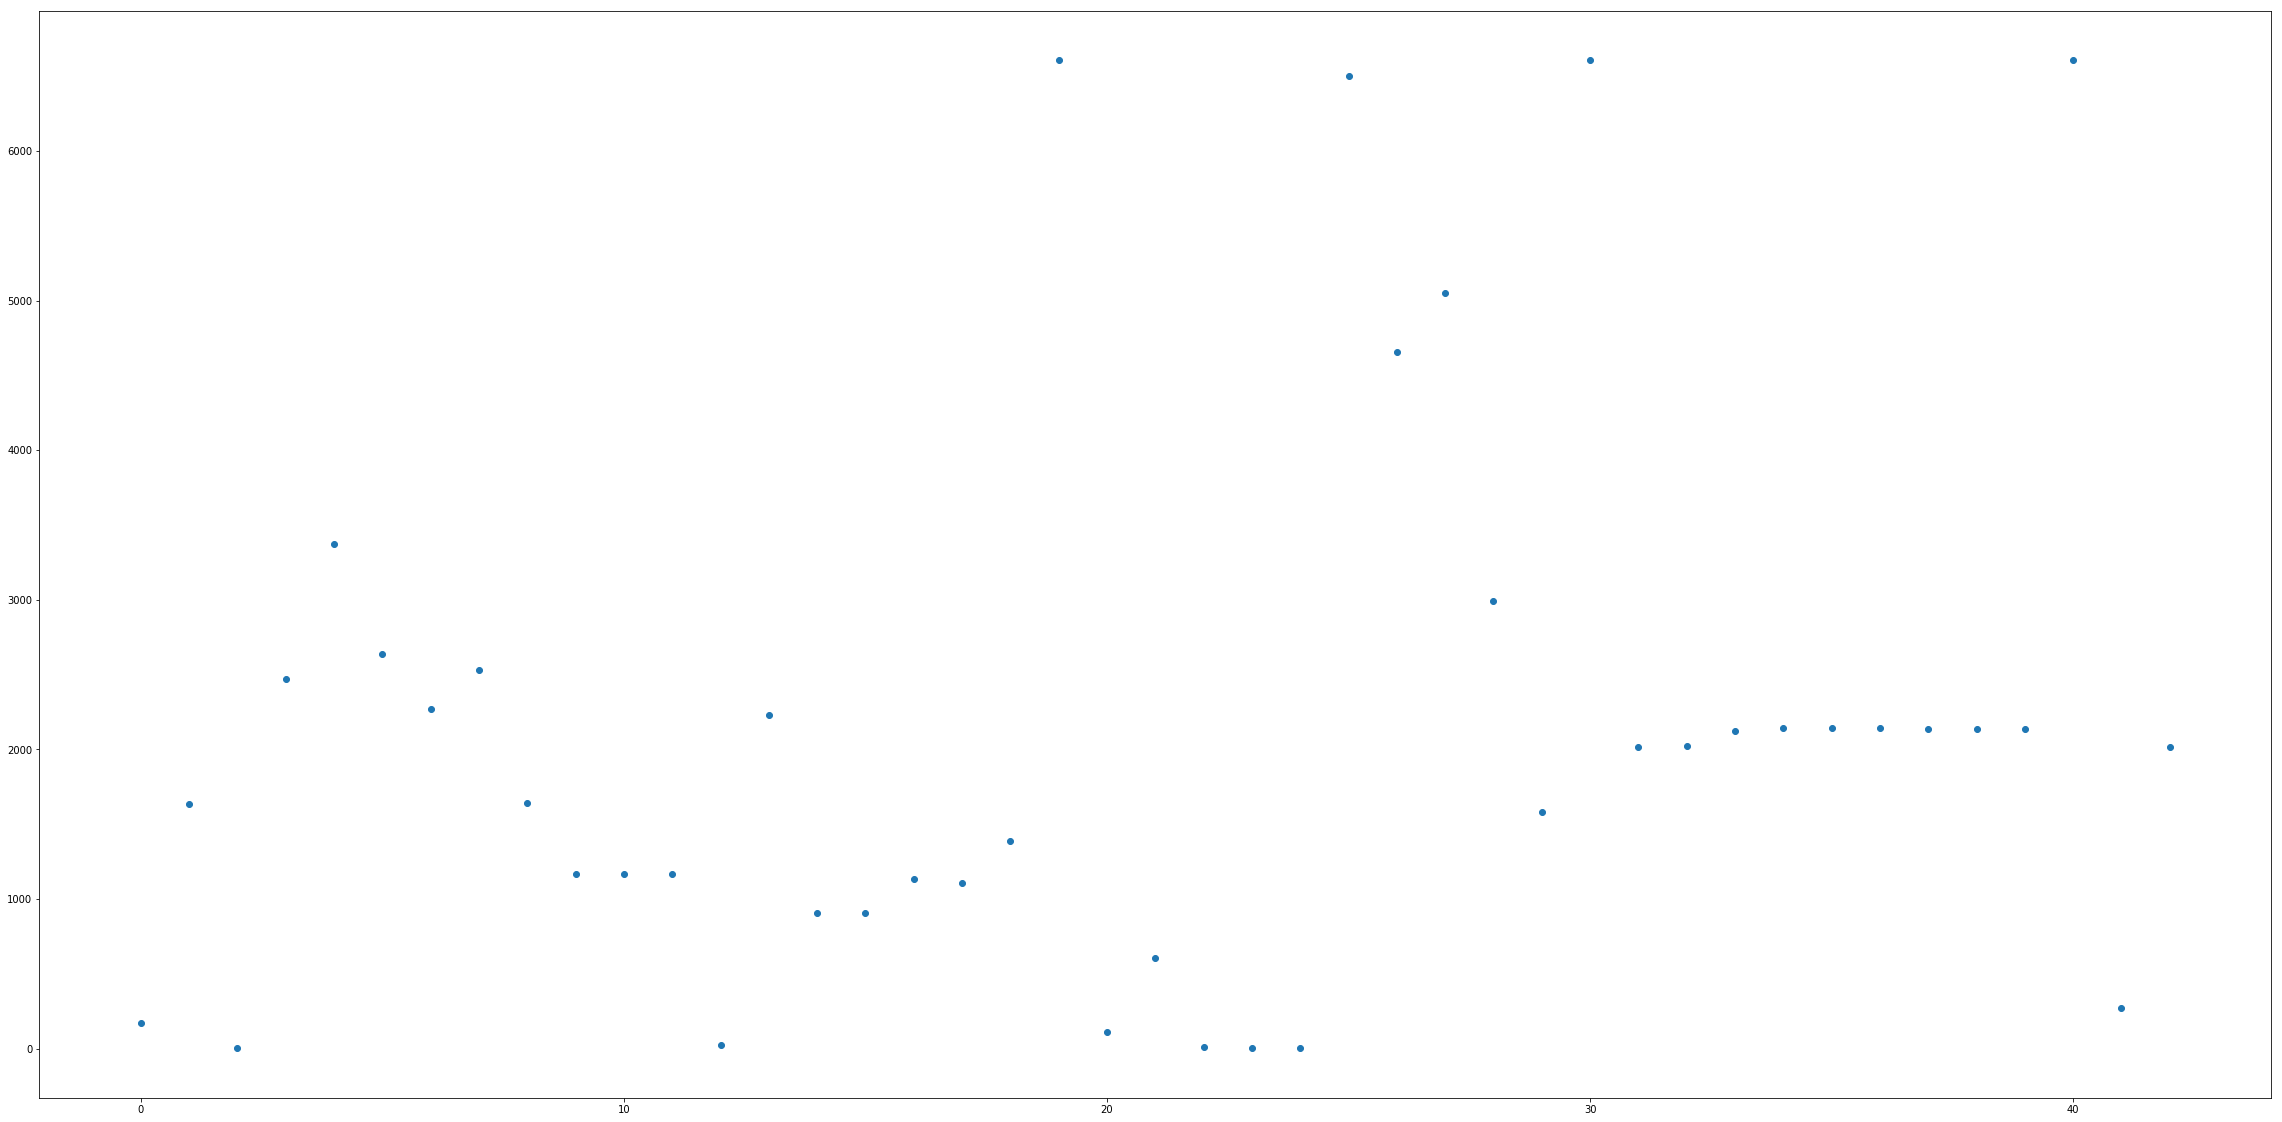

In [19]:
plt.figure(figsize=(40, 20))
plt.scatter(x=[i for i in range(len(null_cols_orig))],y=[listings_original[null_cols_orig].isnull().sum()])
#plt.xlabel([i for i in range(len(listings[listings.isnull().any(axis=1)].columns))])
plt.show()

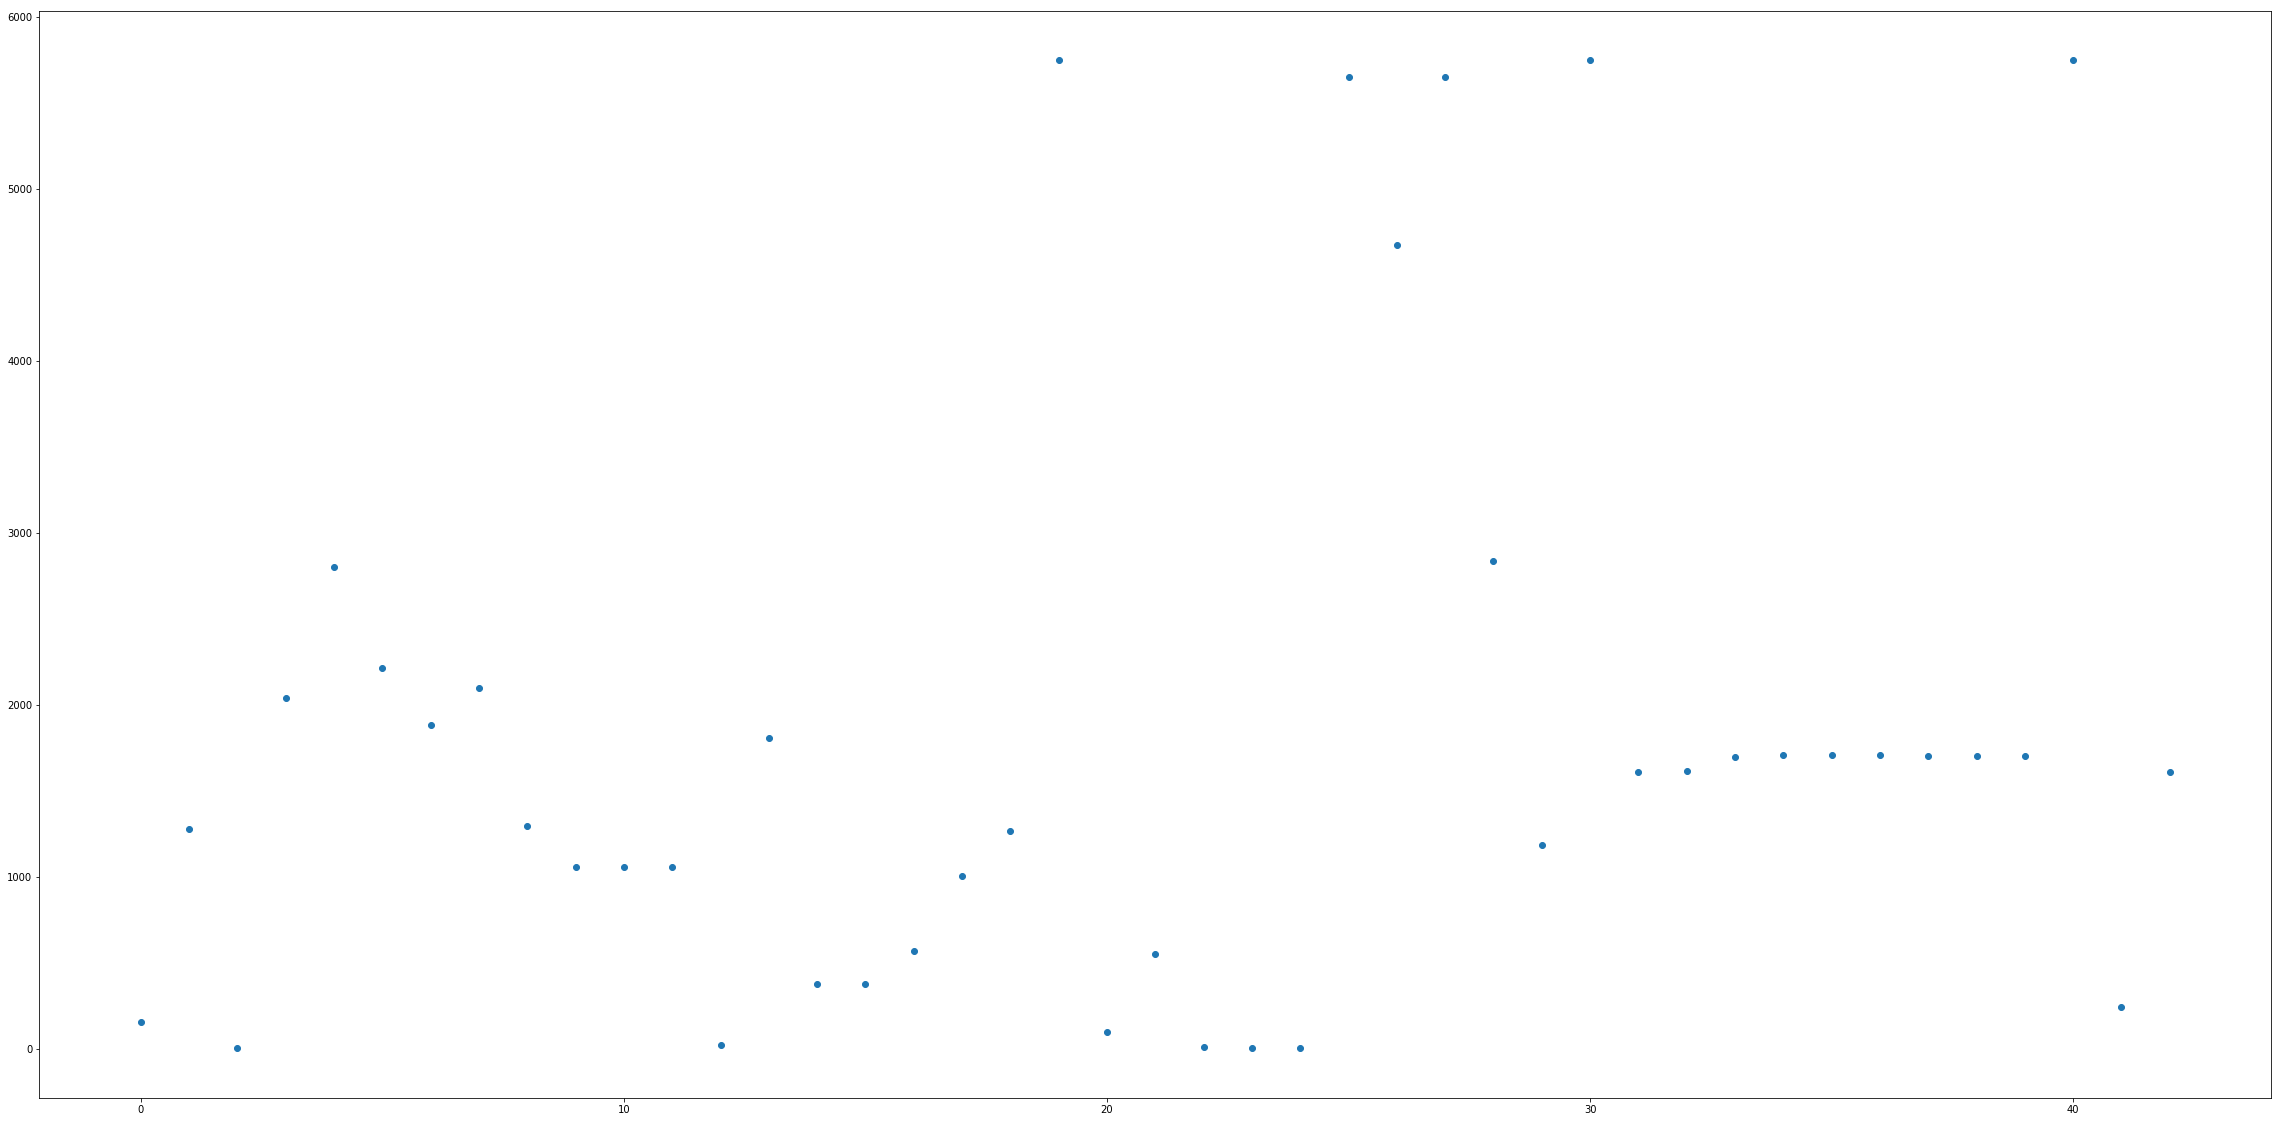

In [20]:
plt.figure(figsize=(40, 20))
plt.scatter(x=[i for i in range(len(null_cols))],y=[listings[null_cols].isnull().sum()])
#plt.xlabel([i for i in range(len(listings[listings.isnull().any(axis=1)].columns))])
plt.show()

In [22]:
listings[null_cols].isnull().sum()

summary                          157
space                           1275
description                        1
neighborhood_overview           2040
notes                           2799
transit                         2212
access                          1883
interaction                     2096
house_rules                     1292
thumbnail_url                   1057
medium_url                      1057
xl_picture_url                  1057
host_location                     18
host_about                      1804
host_response_time               377
host_response_rate               377
host_acceptance_rate             568
host_neighbourhood              1004
neighbourhood                   1267
neighbourhood_group_cleansed    5751
zipcode                           96
market                           548
bathrooms                         10
bedrooms                           3
beds                               4
square_feet                     5651
weekly_price                    4675
m

In [23]:
listings_original[null_cols_orig].isnull().sum()

summary                          173
space                           1635
description                        2
neighborhood_overview           2471
notes                           3375
transit                         2636
access                          2273
interaction                     2530
house_rules                     1642
thumbnail_url                   1166
medium_url                      1166
xl_picture_url                  1166
host_location                     24
host_about                      2228
host_response_time               910
host_response_rate               910
host_acceptance_rate            1131
host_neighbourhood              1107
neighbourhood                   1387
neighbourhood_group_cleansed    6608
zipcode                          109
market                           605
bathrooms                         11
bedrooms                           3
beds                               4
square_feet                     6503
weekly_price                    4654
m

Nulls Analysis

Features that we will not use for modeling no matter what:
thumbnail_url, medium_url, xl_picture_url, 
first_review                    2018
last_review                     2024
jurisdiction_names               273
host_location (bad data)
market (bad data)



Features that have high number of nulls and will definitely be deleted:
    neighbourhood_group_cleansed, square_feet, weekly_price, monthly_price, security_deposit, has_availability, license

Features that have significant number of nulls and might potentially be deleted: 
    Text: space, neighborhood overview, notes, transit, access, interaction, house rules, host_about, 

Features that have many nulls and we may or may not be able to impute:
host_response_time               910
host_response_rate               910
host_acceptance_rate            1131
host_neighbourhood              1107
neighbourhood                   1387
cleaning_fee                    1584
review_scores_rating            2126
review_scores_accuracy          2142
review_scores_cleanliness       2141
review_scores_checkin           2143
review_scores_communication     2139
review_scores_location          2140
review_scores_value             2140

Features that have few nulls and can be imputed easily:
summary                          173
description                        2
zipcode                          109
bathrooms                         11
bedrooms                           3
beds                               4

In [24]:
[i for i in listings.columns]

['house_rules-Topic0',
 'house_rules-Topic1',
 'house_rules-Topic2',
 'house_rules-Topic3',
 'house_rules-Topic4',
 'house_rules-Topic5',
 'house_rules-Topic6',
 'house_rules-Topic7',
 'house_rules-Topic8',
 'house_rules-Topic9',
 'house_rules-Topic10',
 'house_rules-Topic11',
 'house_rules-Topic12',
 'house_rules-Topic13',
 'house_rules-Topic14',
 'house_rules-Topic15',
 'house_rules-Topic16',
 'house_rules-Topic17',
 'house_rules-Topic18',
 'house_rules-Topic19',
 'house_rules-Dominant_Topic',
 'interaction-Topic0',
 'interaction-Topic1',
 'interaction-Topic2',
 'interaction-Topic3',
 'interaction-Topic4',
 'interaction-Topic5',
 'interaction-Topic6',
 'interaction-Topic7',
 'interaction-Topic8',
 'interaction-Topic9',
 'interaction-Topic10',
 'interaction-Topic11',
 'interaction-Topic12',
 'interaction-Topic13',
 'interaction-Topic14',
 'interaction-Topic15',
 'interaction-Topic16',
 'interaction-Topic17',
 'interaction-Topic18',
 'interaction-Topic19',
 'interaction-Dominant_Topic'

# Exploring features that have no nulls

In [47]:
[col for col in listings.columns if col not in null_cols]

['house_rules-Topic0',
 'house_rules-Topic1',
 'house_rules-Topic2',
 'house_rules-Topic3',
 'house_rules-Topic4',
 'house_rules-Topic5',
 'house_rules-Topic6',
 'house_rules-Topic7',
 'house_rules-Topic8',
 'house_rules-Topic9',
 'house_rules-Topic10',
 'house_rules-Topic11',
 'house_rules-Topic12',
 'house_rules-Topic13',
 'house_rules-Topic14',
 'house_rules-Topic15',
 'house_rules-Topic16',
 'house_rules-Topic17',
 'house_rules-Topic18',
 'house_rules-Topic19',
 'house_rules-Dominant_Topic',
 'interaction-Topic0',
 'interaction-Topic1',
 'interaction-Topic2',
 'interaction-Topic3',
 'interaction-Topic4',
 'interaction-Topic5',
 'interaction-Topic6',
 'interaction-Topic7',
 'interaction-Topic8',
 'interaction-Topic9',
 'interaction-Topic10',
 'interaction-Topic11',
 'interaction-Topic12',
 'interaction-Topic13',
 'interaction-Topic14',
 'interaction-Topic15',
 'interaction-Topic16',
 'interaction-Topic17',
 'interaction-Topic18',
 'interaction-Topic19',
 'interaction-Dominant_Topic'

Features that will not be used for modeling:
'id',
'listing_url',
'scrape_id',
'last_scraped',
'picture_url',
'host_id',
'host_url',
'host_name',
'experiences_offered' (has all 'none'),
host_thumbnail_url',
'host_picture_url',
'host_has_profile_pic',
'street' (already have lat, long, and other geo features)
'state',
'smart_location' (using more exact geo data)
'country_code',
'country',
'is_location_exact',
'bed_type',
'extra_prople',
'maximum_nights',








Features that contain potentially useful info:
    name (contains listing headline) - a text column
    

Features we will use in transformed form:
    amenities, host_verifications,
    

Exploring the features Visually:

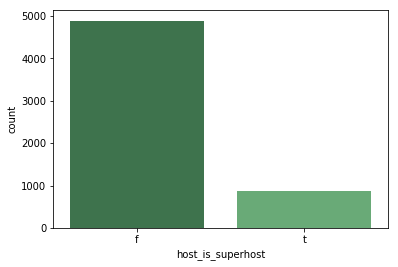

In [26]:
sb.countplot(x="host_is_superhost", data=listings, palette="Greens_d");

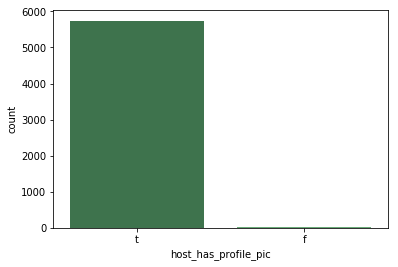

In [27]:
sb.countplot(x="host_has_profile_pic", data=listings, palette="Greens_d");

Insight: probably useless to use host_has_profile_pic

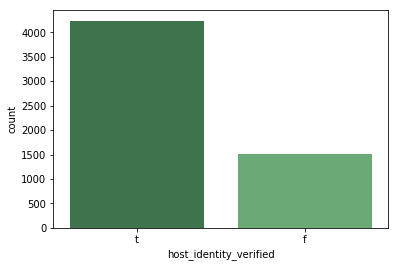

In [28]:
sb.countplot(x="host_identity_verified", data=listings, palette="Greens_d");

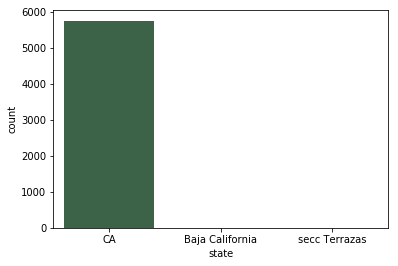

In [29]:
sb.countplot(x="state", data=listings, palette="Greens_d");

Insight: will not use state

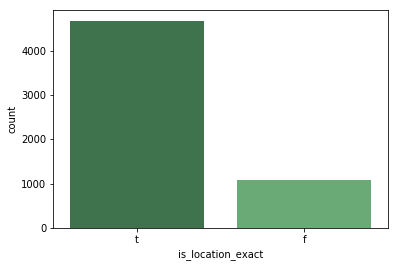

In [30]:
sb.countplot(x="is_location_exact", data=listings, palette="Greens_d");

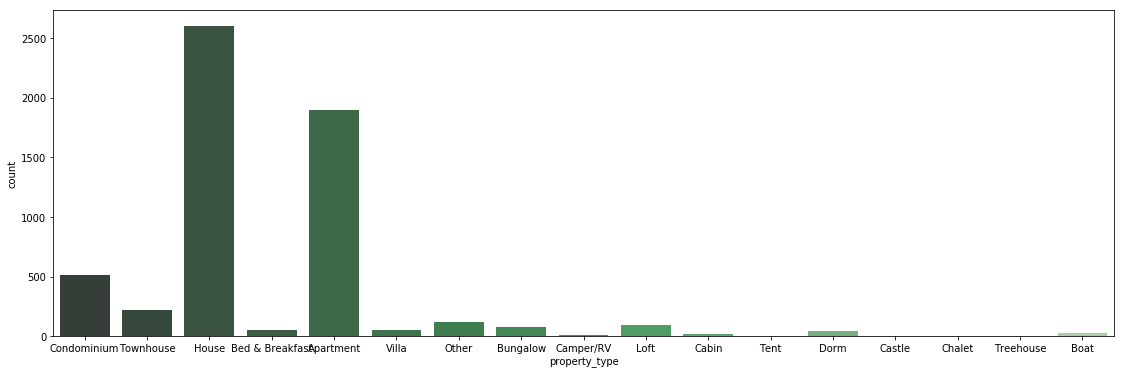

In [31]:
fig, ax = plt.subplots(figsize=(19,6))
sb.countplot(ax=ax,x="property_type", data=listings, palette="Greens_d");

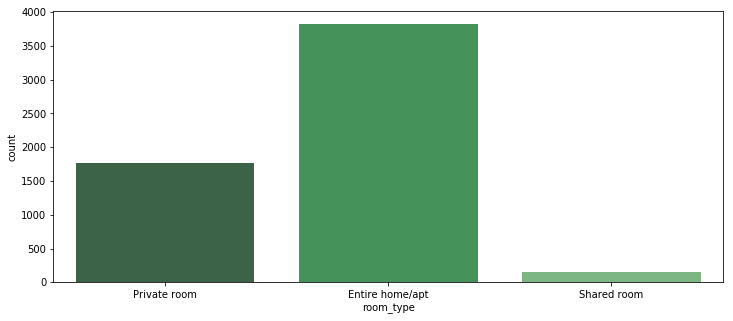

In [32]:
fig, ax = plt.subplots(figsize=(12,5))
sb.countplot(ax=ax,x="room_type", data=listings, palette="Greens_d");

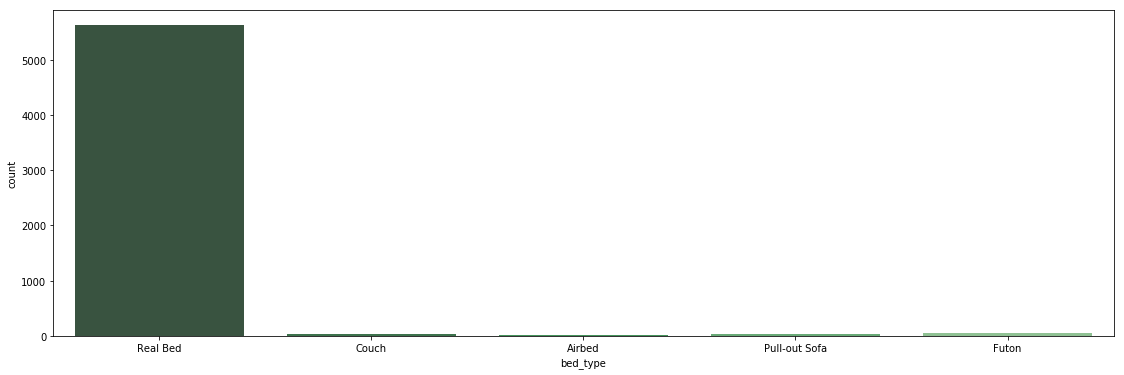

In [33]:
fig, ax = plt.subplots(figsize=(19,6))
sb.countplot(ax=ax,x="bed_type", data=listings, palette="Greens_d");

Insight: will not use bed type

Plotting Features Related to Listing Size

In [34]:
cols = ['accommodates','bathrooms', 'bedrooms', 'beds']

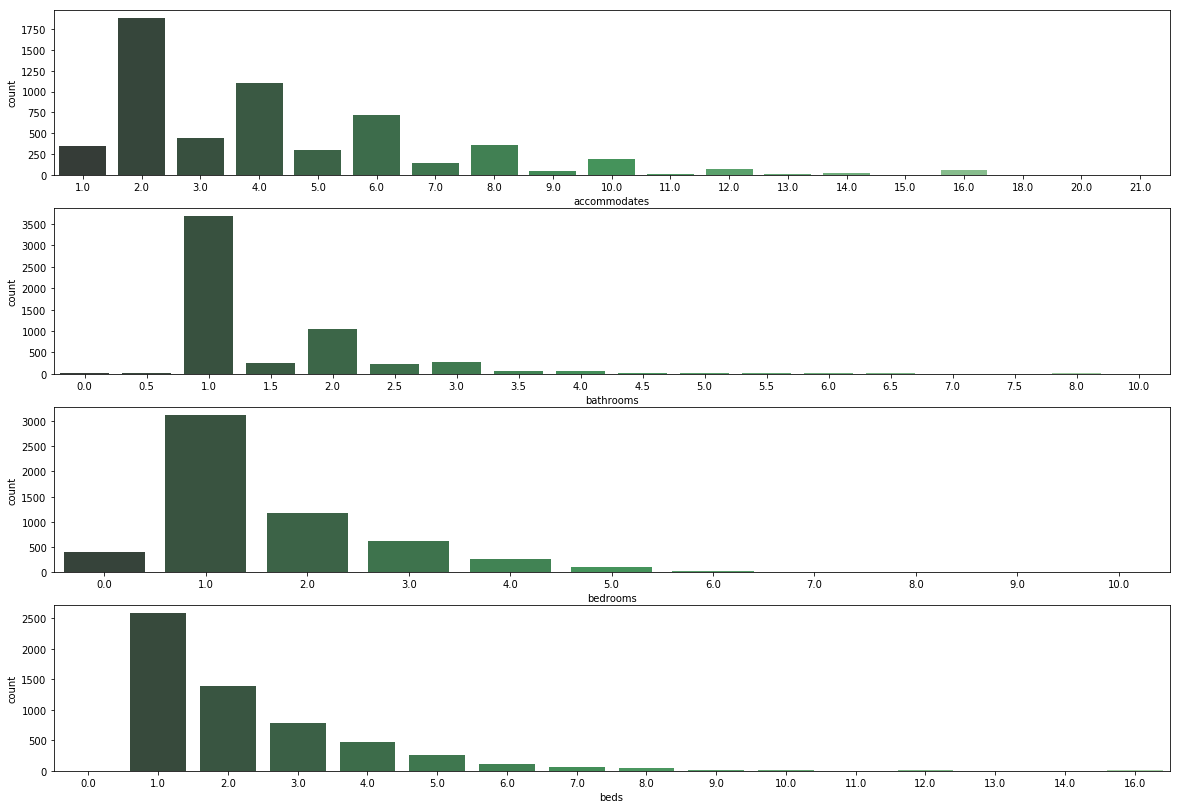

In [35]:
fig, axes = plt.subplots(nrows = len(cols), ncols = 1, sharex = False, sharey= False, figsize = (20,14))
for i,val in enumerate(cols):
    sb.countplot(ax=axes[i],x=val, data=listings, palette="Greens_d");

In [38]:
corrmx = listings.corr()

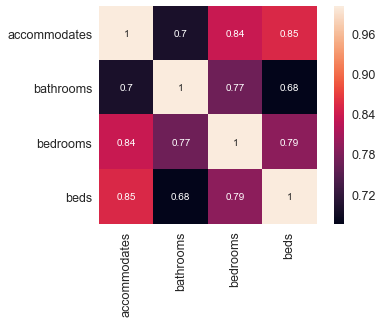

In [39]:
temp = listings.copy()
temp = temp.fillna(temp.mean())
cm = np.corrcoef(temp[cols].values.T)
sb.set(font_scale=1.25)
hm = sb.heatmap(cm, cbar=True, annot=True, square=True, annot_kws={'size':10}, yticklabels=cols, xticklabels=cols)
plt.show()

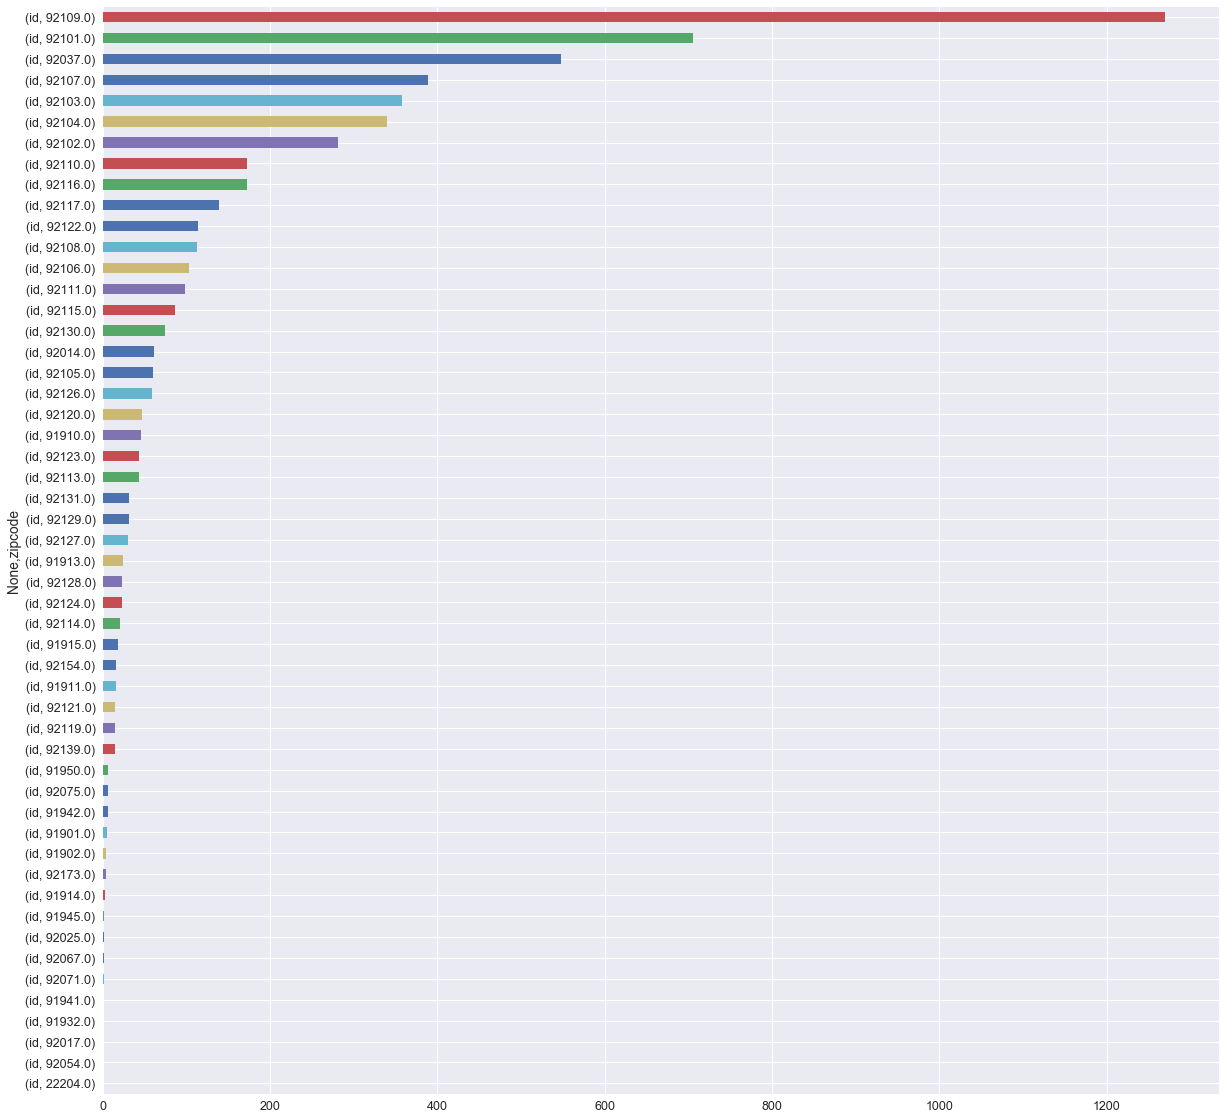

In [40]:
temp = listings.copy()
temp['zipcode'] = temp['zipcode'].astype(float)
nghbrd_list_count = temp[['zipcode','id']].groupby(['zipcode'])

plt.figure()
nghbrd_list_count.count().sort_values(by='id').unstack().plot(kind='barh', figsize=(20,20))
plt.show()

Amenities Visualization 

In [41]:
has = listings.filter(regex='has')
has = has.drop(columns=['host_has_profile_pic', 'has_availability', 'host_has_profile_pic_bin'])

In [42]:
has_df = pd.DataFrame(has.sum(), columns=['Sum'])
has_df = has_df.sort_values(by='Sum')

In [43]:
has_df['Amenity'] = has_df.index

In [44]:
has_df['Amenity'] = has_df['Amenity'].astype(str)

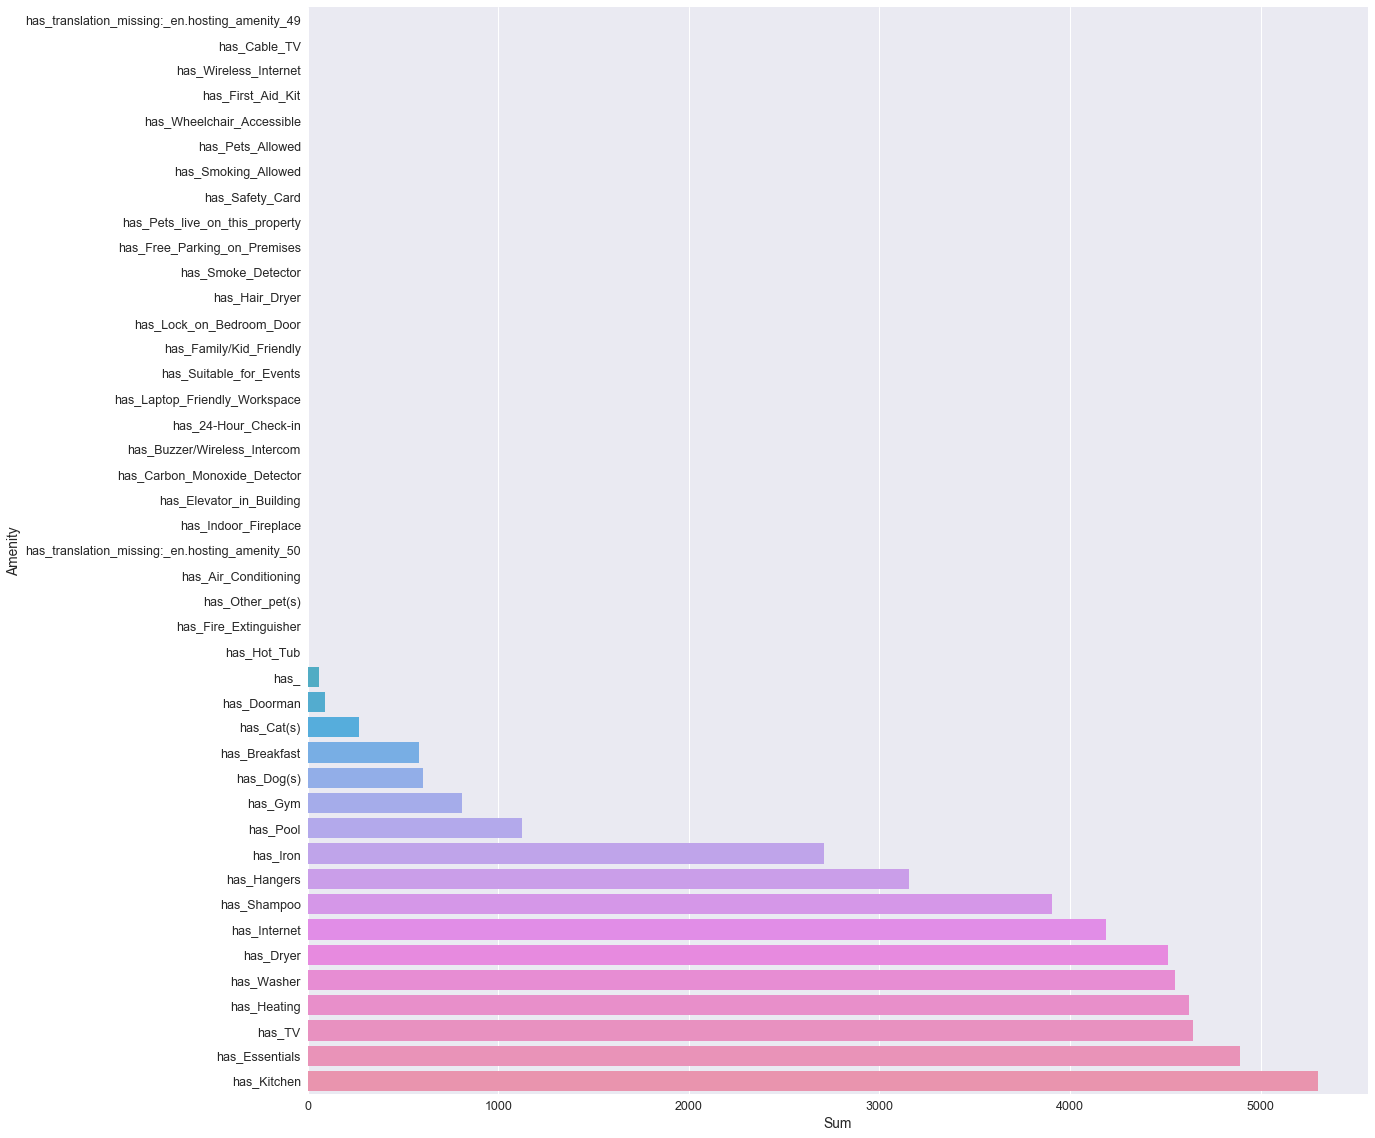

In [45]:
fig, ax = plt.subplots(figsize=(19,20))
sb.barplot(ax = ax, y=has_df['Amenity'], x=has_df['Sum'], data=has_df);

In [46]:
listings.has_Cable_TV

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
       ... 
5723    0.0
5724    0.0
5725    0.0
5726    0.0
5727    0.0
5728    0.0
5729    0.0
5730    0.0
5731    0.0
5732    0.0
5733    0.0
5734    0.0
5735    0.0
5736    0.0
5737    0.0
5738    0.0
5739    0.0
5740    0.0
5741    0.0
5742    0.0
5743    0.0
5744    0.0
5745    0.0
5746    0.0
5747    0.0
5748    0.0
5749    0.0
5750    0.0
5751    0.0
5752    0.0
Name: has_Cable_TV, Length: 5751, dtype: float64

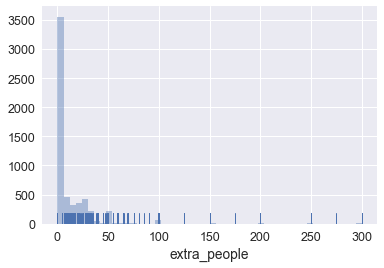

In [53]:
sb.distplot(listings['extra_people'], kde=False, rug=True)

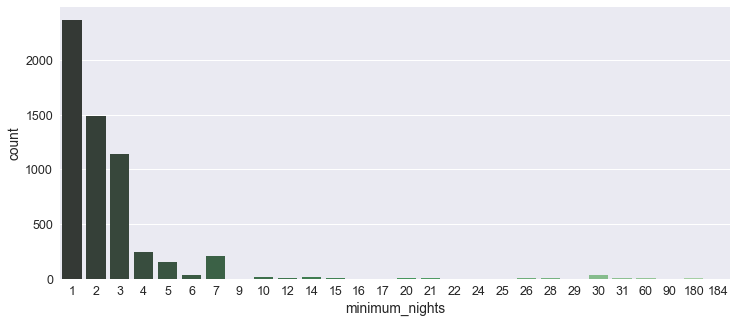

In [59]:
temp = pd.DataFrame(listings['minimum_nights'].astype(int))
fig, ax = plt.subplots(figsize=(12,5))
sb.countplot(ax=ax,x="minimum_nights", data=temp, palette="Greens_d");

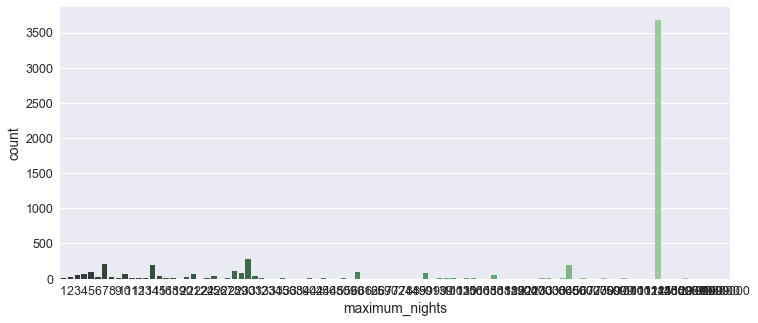

In [62]:
temp = pd.DataFrame(listings['maximum_nights'].astype(int))
fig, ax = plt.subplots(figsize=(12,5))
sb.countplot(ax=ax,x="maximum_nights", data=temp, palette="Greens_d");

Insight: min nights could be helpful, max nights no

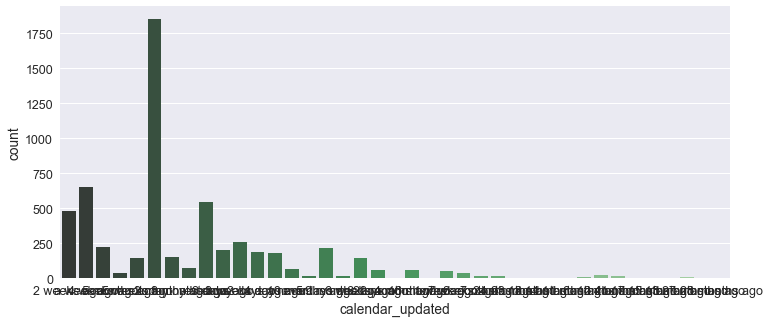

In [56]:
fig, ax = plt.subplots(figsize=(12,5))
sb.countplot(ax=ax,x="calendar_updated", data=listings, palette="Greens_d");

In [63]:
listings.calendar_updated.unique()

array(['2 weeks ago', 'a week ago', '4 weeks ago', '5 months ago',
       '5 weeks ago', 'today', '2 months ago', '3 months ago',
       'yesterday', '3 days ago', '3 weeks ago', '2 days ago',
       '4 days ago', 'never', '10 months ago', '5 days ago',
       '9 months ago', '6 weeks ago', '6 days ago', '22 months ago',
       '4 months ago', '16 months ago', '1 week ago', '7 weeks ago',
       '8 months ago', '7 months ago', '24 months ago', '23 months ago',
       '18 months ago', '14 months ago', '11 months ago', '6 months ago',
       '12 months ago', '41 months ago', '17 months ago', '15 months ago',
       '13 months ago', '27 months ago', '28 months ago'], dtype=object)

Insight: will transform feature into a numerical feature (pending Sankarshan)

In [64]:
av_cols = ['availability_30', 'availability_60', 'availability_90', 'availability_365']

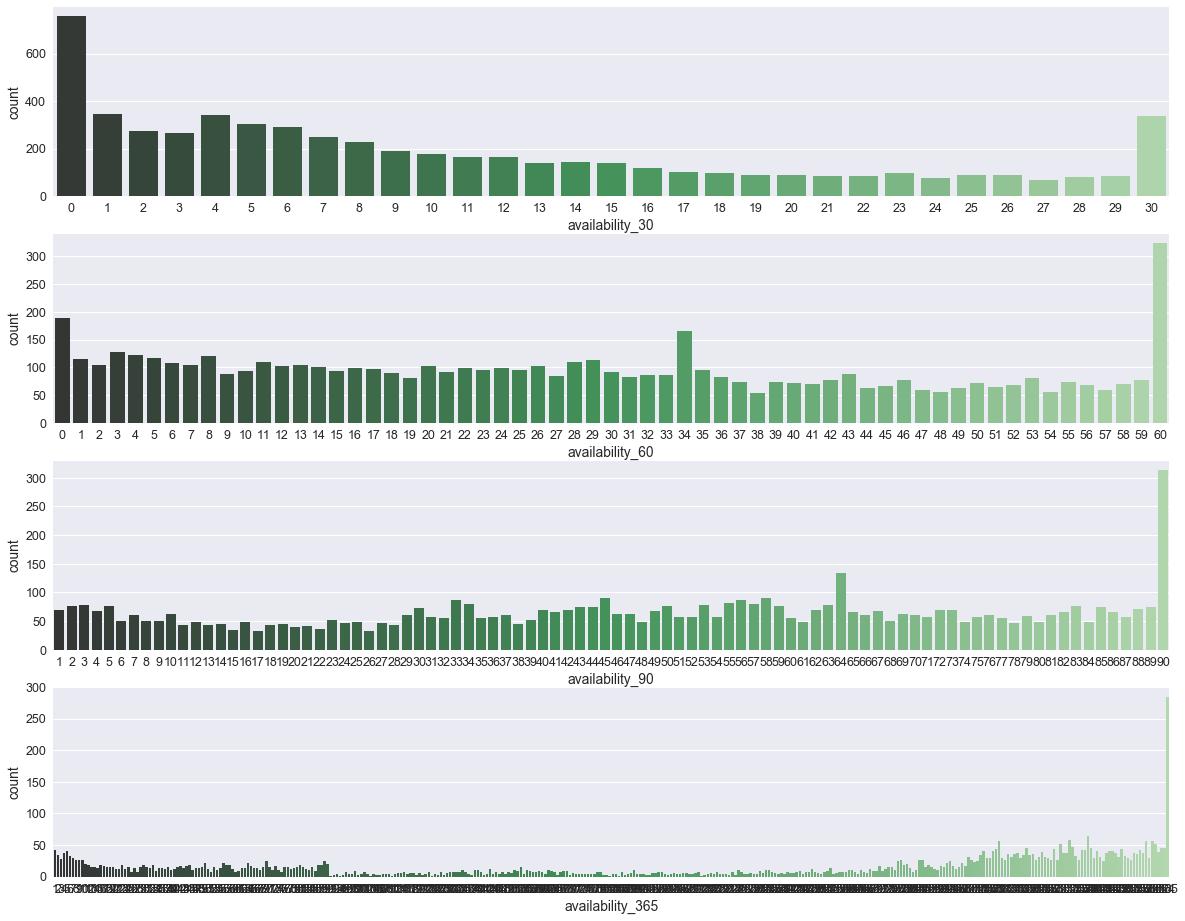

In [68]:
temp = listings[av_cols].astype(int)
fig, axes = plt.subplots(nrows = len(av_cols), ncols = 1, sharex = False, sharey= False, figsize = (20,16))
for i,val in enumerate(av_cols):
    sb.countplot(ax=axes[i],x=val, data=temp, palette="Greens_d");

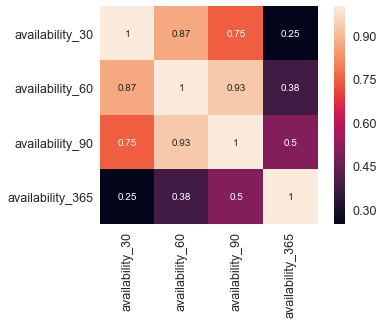

In [69]:
temp = listings.copy()
temp = temp.fillna(temp.mean())
cm = np.corrcoef(temp[av_cols].values.T)
sb.set(font_scale=1.25)
hm = sb.heatmap(cm, cbar=True, annot=True, square=True, annot_kws={'size':10}, yticklabels=av_cols, xticklabels=av_cols)
plt.show()

Insight: will keep all 4 but will eventually end up using one of the 4 as they are highly correlated, probably availability_30

Cols to do next:
    'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'calendar_updated',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'calendar_last_scraped',
 'number_of_reviews',
 'requires_license',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'calculated_host_listings_count'

Insight: Will discard state also

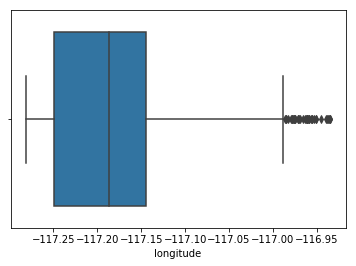

In [71]:
ax = sb.boxplot(x="longitude", data=listings_original)

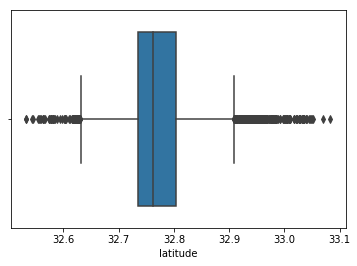

In [72]:
ax = sb.boxplot(x="latitude", data=listings_original)

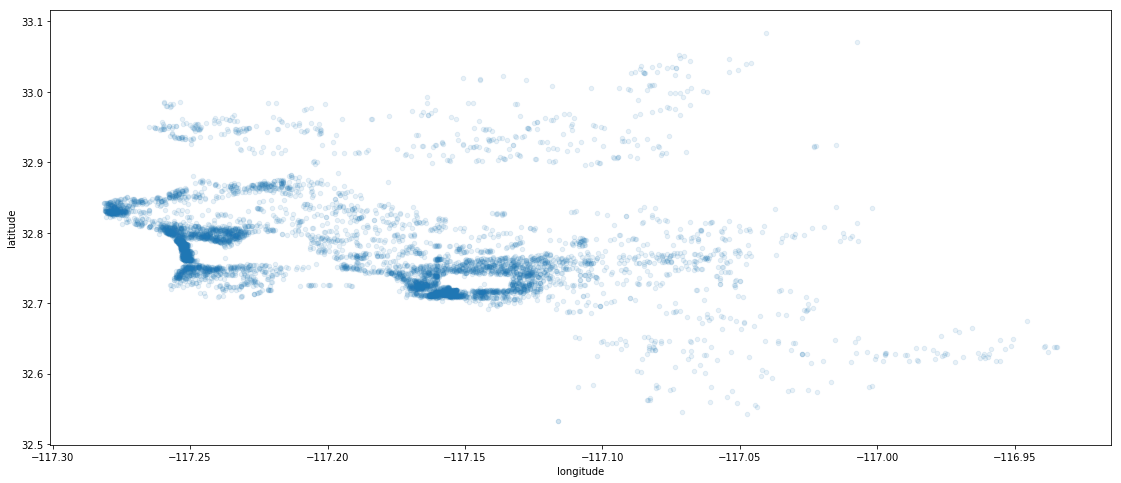

In [82]:
fig, ax = plt.subplots(figsize=(19,8))
listings_original.plot(ax=ax,kind='scatter',x='longitude',y='latitude', alpha=0.1)

In [ ]:
fig, ax = plt.subplots(figsize=(19,6))
sb.countplot(ax=ax,x="property_type", data=listings_original, palette="Greens_d");

Price Variable (Target Var)

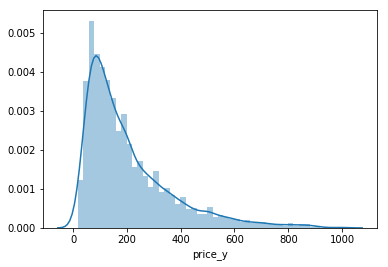

In [98]:
sb.distplot(listings['price_y'])

Now plotting transformations of price 

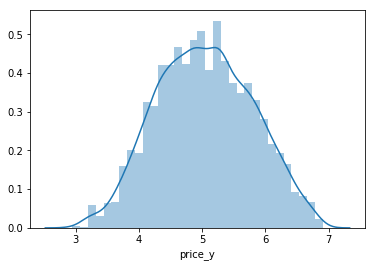

In [100]:
sb.distplot(np.log(listings['price_y']))

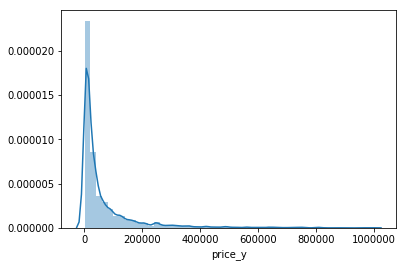

In [102]:
sb.distplot(listings['price_y']**2)

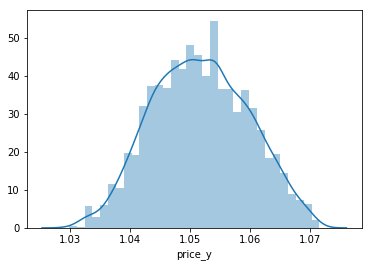

In [112]:
sb.distplot(listings['price_y']**(0.01))

In [ ]:
'host_listings_count',
 'host_total_listings_count',